In [1]:
import numpy as np
import utils
from env import Maze

%load_ext autoreload
%autoreload 2

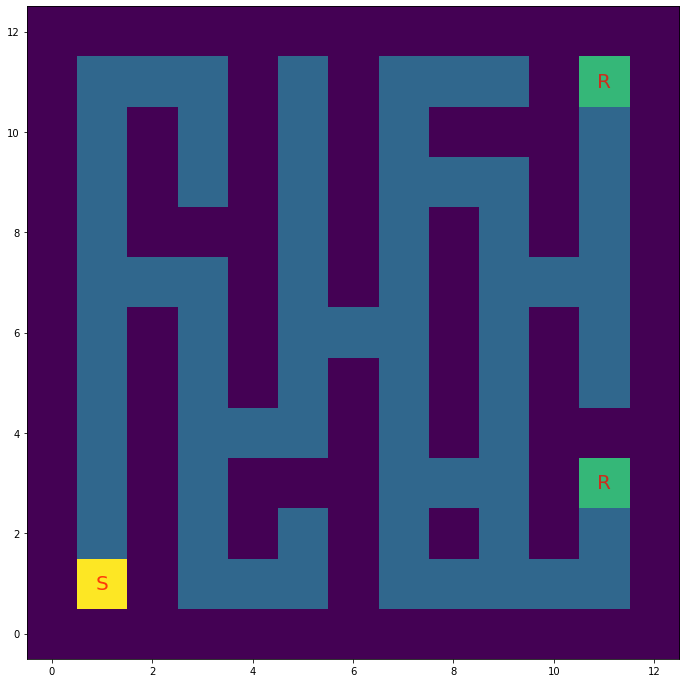

In [2]:
#Set up environment

width = 13

height = 13

start_state = (1, 1)

reward_states = [(11, 11), (3, 11)]

rewards = [10, 5]

walls = [*[(wall, 0) for wall in range(13)],
         *[(wall, 12) for wall in range(13)],
         *[(0, wall) for wall in range(13)],
         *[(12, wall) for wall in range(13)],
         *[(wall, 2) for wall in range(7)], 
         *[(wall, 2) for wall in range(8, 11)],
         (8,3),
         *[(wall, 4) for wall in range(5, 12)],
         *[(wall, 4) for wall in range(2, 4)],
         (3,5),
         *[(wall, 6) for wall in range(6)],
         *[(wall, 6) for wall in range(7, 12)],
         (2, 8),
         *[(wall, 8) for wall in range(4, 9)],
         (10,8),
         (10,9),
         *[(wall, 10) for wall in range(8, 12)],
         *[(wall, 10) for wall in range(2, 7)],
         (4, 11)
        ]

utils.plot((height, width), walls, start_state, reward_states)



In [3]:
env_info={
    'width':width,
    'height':height,
    'walls': walls,
    'start_state':start_state,
    'reward_states':reward_states,
    'rewards':rewards
}

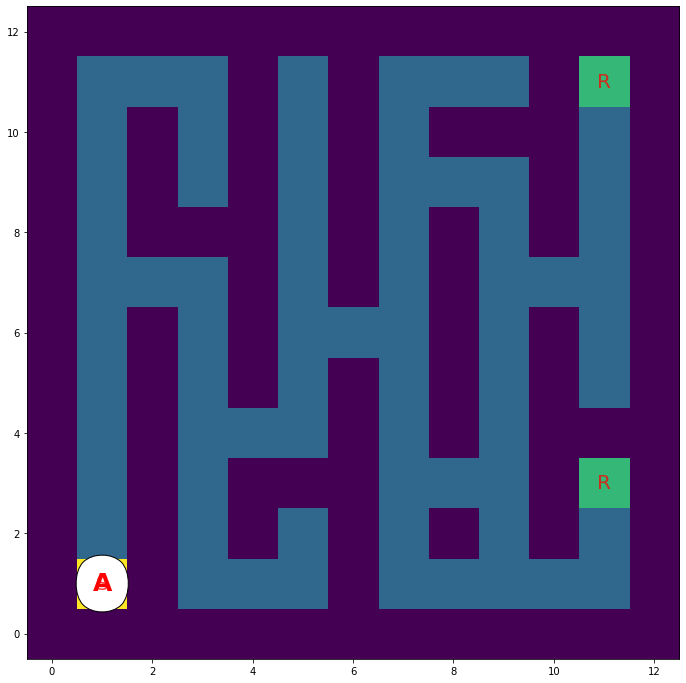

In [4]:
env = Maze()

env.env_init(env_info)

env.env_start()

env.env_plot()

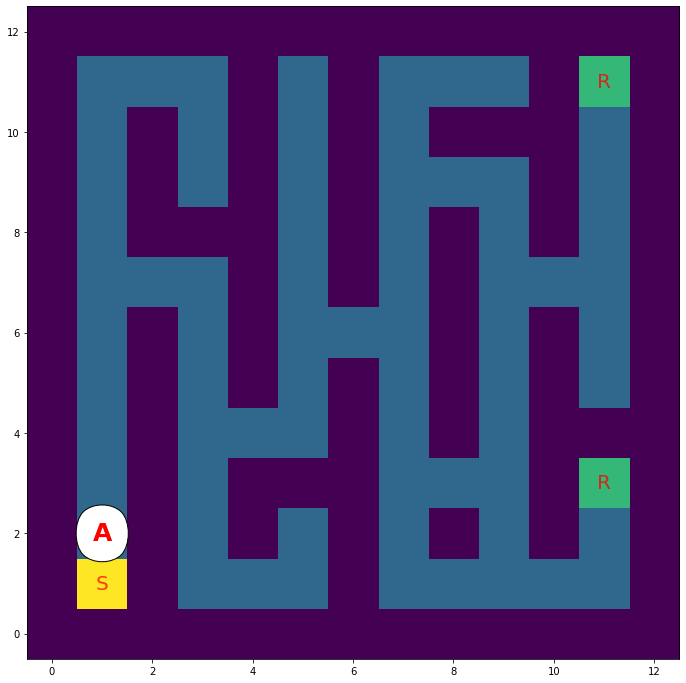

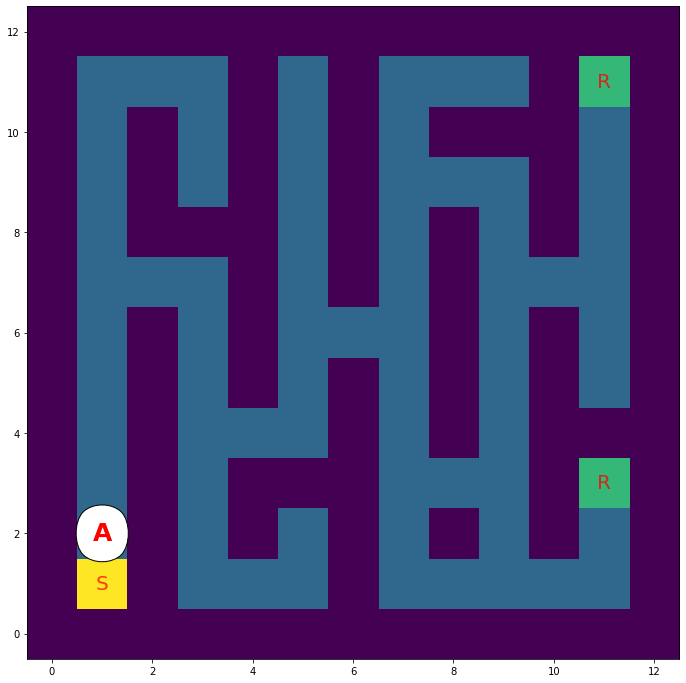

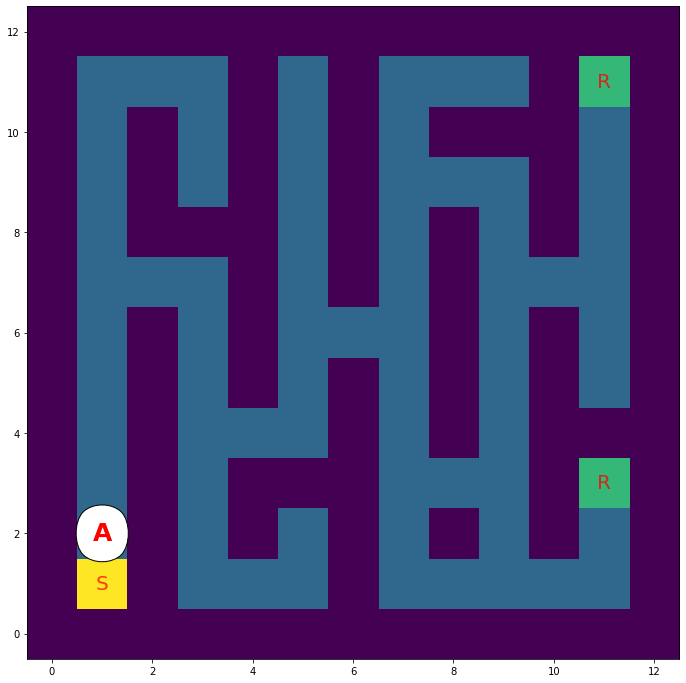

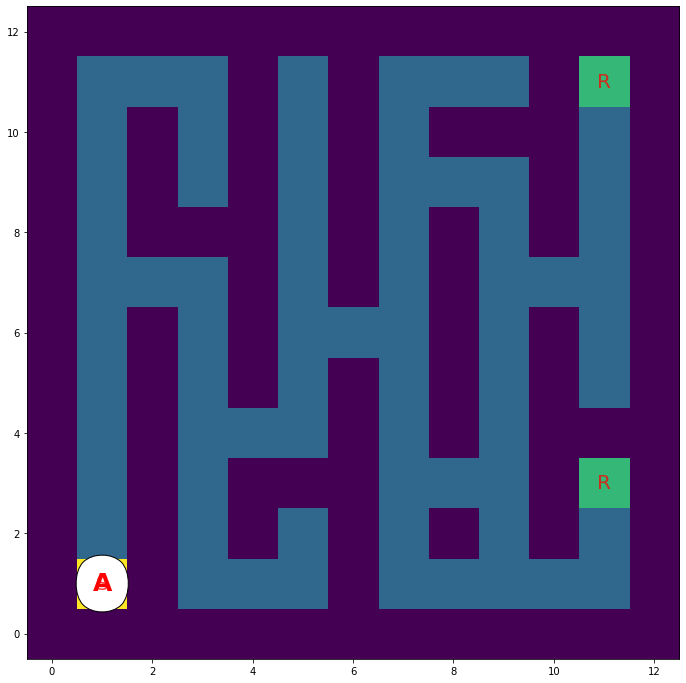

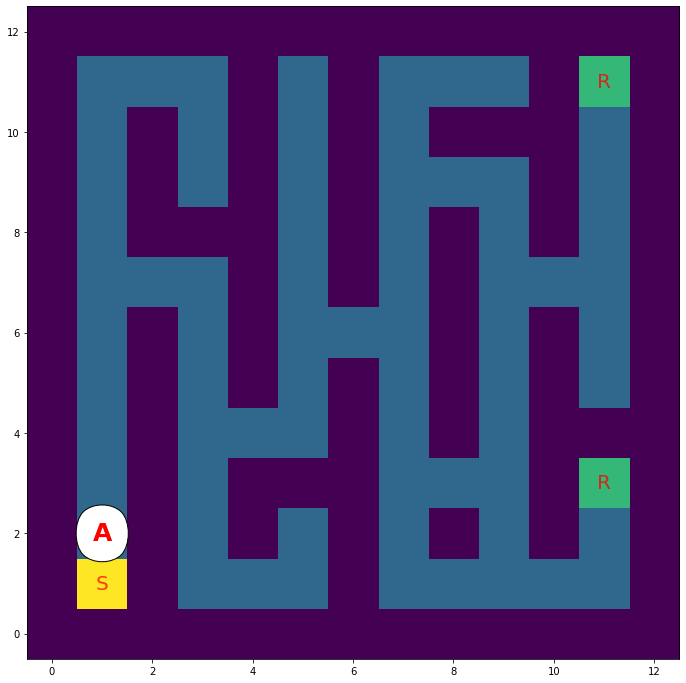

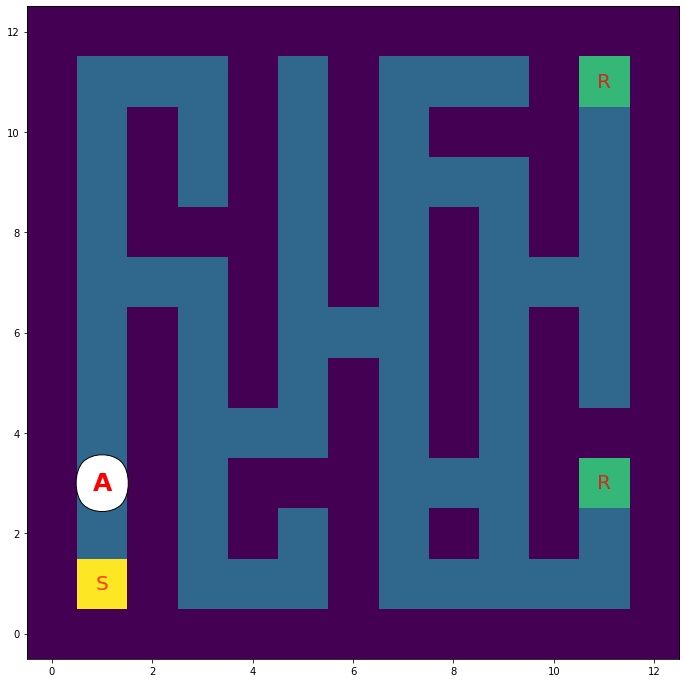

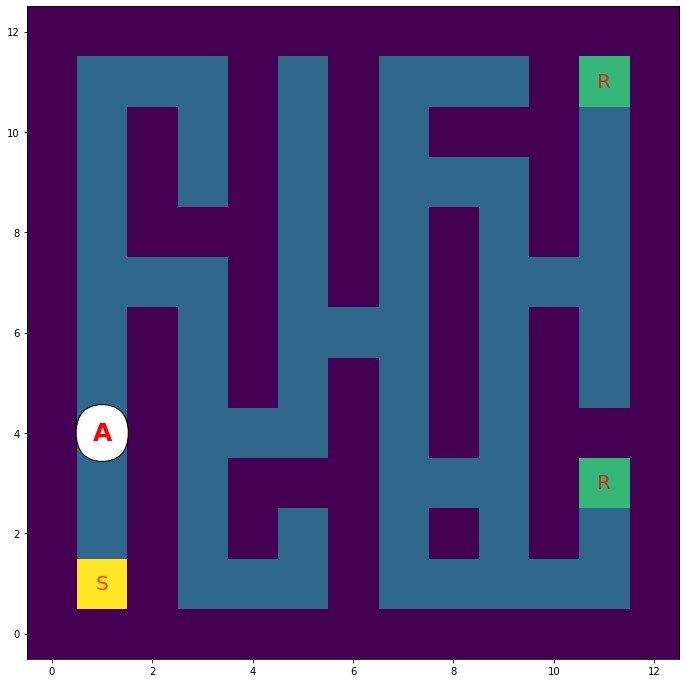

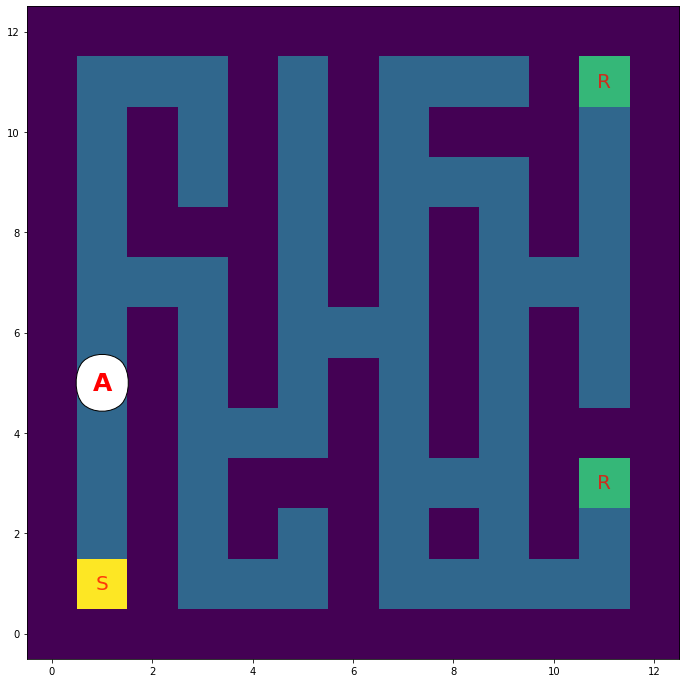

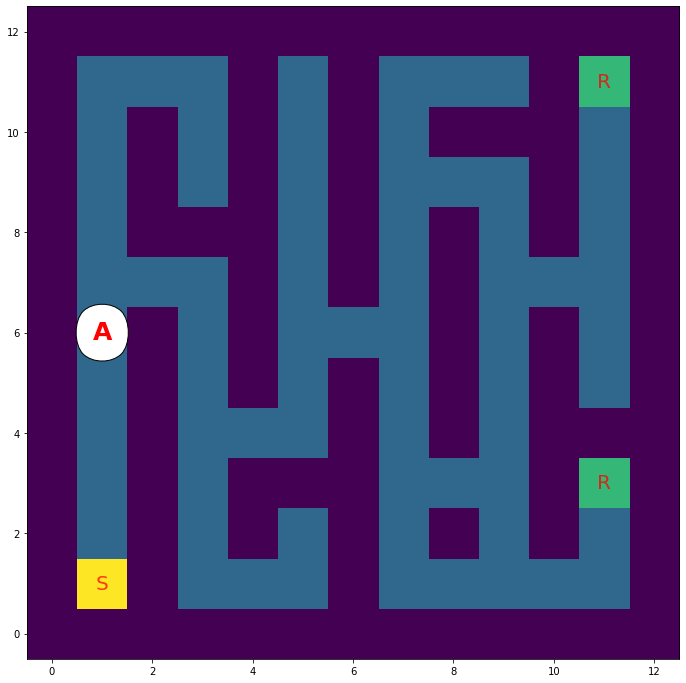

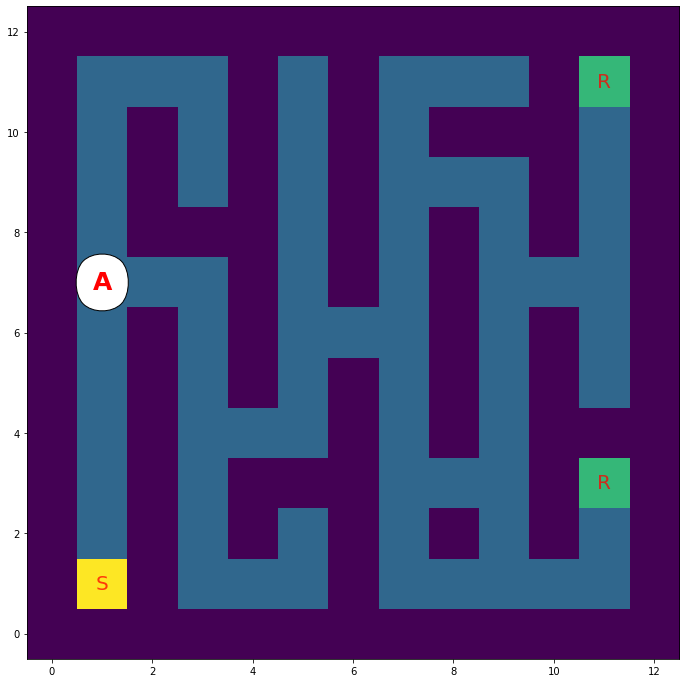

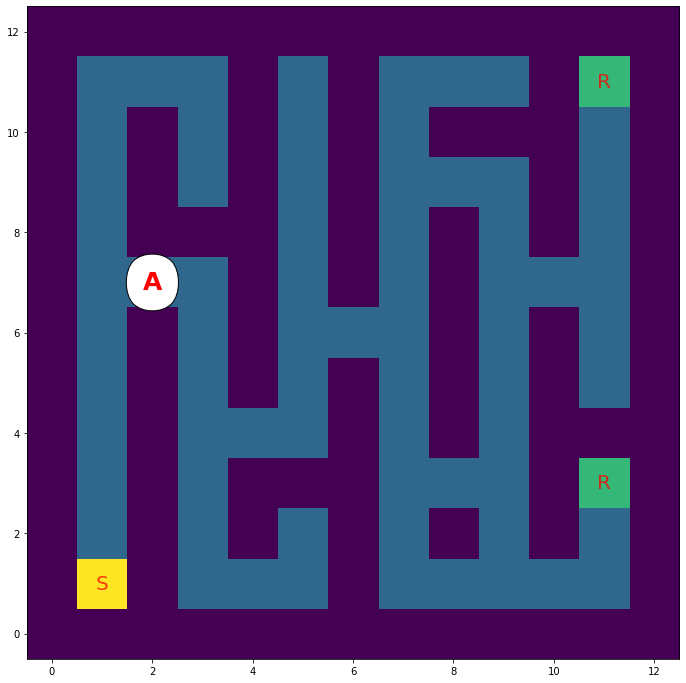

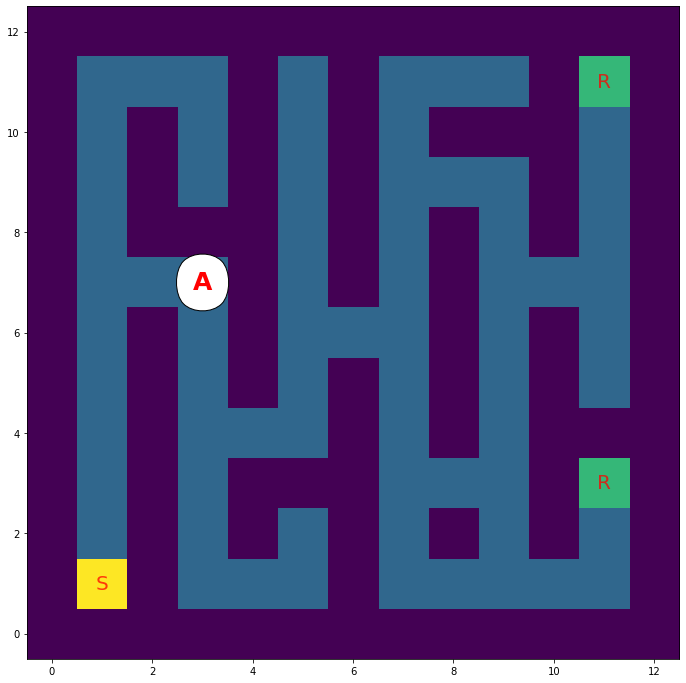

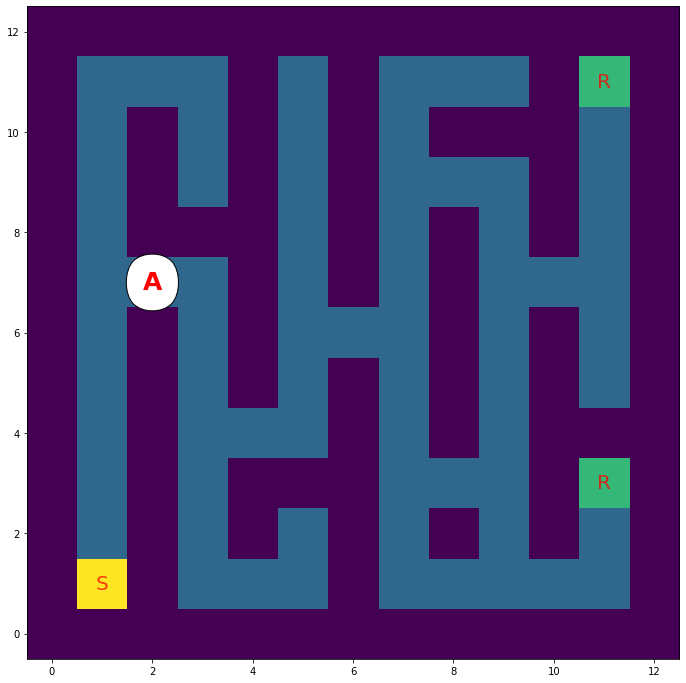

In [5]:
#Simulate some actions

actions = [0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 3]

expected_states = [27, 27, 27, 14, 27, 40, 53, 66, 79, 92, 93, 94, 93]

visited_states = []

env = Maze()

env.env_init(env_info)

env.env_start()


for action in actions:
    observation = env.env_step(action)
    visited_states.append(observation[1])
    
    env.env_plot()
    
assert expected_states==visited_states, "Action transitions not correctly implemented"

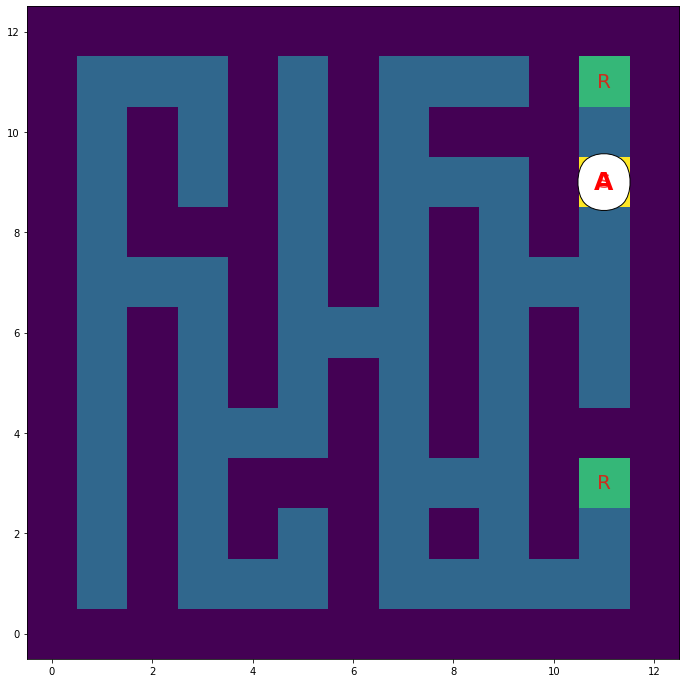

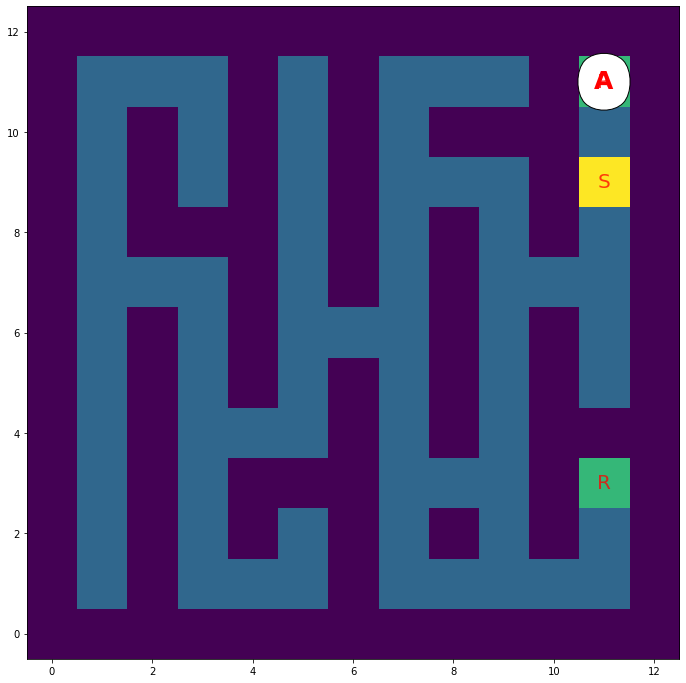

In [41]:
#Simulate terminal state
env_info['start_state'] = (9, 11)

env = Maze()

env.env_init(env_info)

expected_term = [False, True]
term = []

env.env_start()

env.env_plot()

term.append(env.env_step(0)[2])
term.append(env.env_step(0)[2])

env.env_plot()

assert term==expected_term, "Terminal state not correctly implemented"

In [42]:
#Test the reset

observation = env.env_reset()

index = env_info['start_state'][0]*env_info['width'] + env_info['start_state'][1]

assert observation[1]==(index), "Reset not correctly implemented!"

In [22]:
#Simulate terminal state
env_info['start_state'] = (14, 14)

env = Maze()

env.env_init(env_info)

term = []

env.env_start()
try:
    env.env_step(0)[2]
    raise Exception("Warning not correctly implemented")
except ValueError:
    print("Worked!")

Worked!
